In [1]:
# std packages
%matplotlib inline
import numpy as np
import scipy.signal as sig
import scipy.stats as stats
import matplotlib.pyplot as plt

import h5py as h5
import os, sys, glob

# Basic data structure

In [2]:
# where the data is located
# Download from https://gw-openscience.org/auxiliary/GW170814/
data_dir = './aux_release' 

# name of a random file inside data_dir
file_name = '/L1/L-L1_AUXR-1186738240-64.h5' 
# here 1186738240 is the gps starting time of the data; it is always an integer multiple of 64
# 64 is the duration in sec

# read the data
fid = h5.File(data_dir + file_name, 'r')

# top layer
print('Top level layers: (a sub system in LIGO)')
print([key for key in fid.keys()], '\n')

# and top level attributes
print('Top level attributes: ')
for attrs in fid.attrs:
    print(attrs, fid.attrs[attrs])
print('\n')
    
# secondary layer
grp_top = fid['ISI'] # take ISI for example

print('Secondary layers: (each corresponds to a LIGO channel)')
print([key for (key, cnt) in zip(grp_top.keys(), np.arange(5))], '\n\n') 

Top level layers: (a sub system in LIGO)
['ASC', 'HPI', 'IMC', 'ISI', 'LSC', 'OMC', 'PEM', 'PSL', 'SUS', 'TCS'] 

Top level attributes: 
duration 64
gps_start 1186738240
ifo L1


Secondary layers: (each corresponds to a LIGO channel)
['ISI-BS_CAL_CART_RX_OUT_DQ', 'ISI-BS_CAL_CART_RY_OUT_DQ', 'ISI-BS_CAL_CART_RZ_OUT_DQ', 'ISI-BS_CAL_CART_X_OUT_DQ', 'ISI-BS_CAL_CART_Y_OUT_DQ'] 




In [3]:
# inside each channel
# a valid channel
chan_val = grp_top['ISI-BS_CAL_CART_RX_OUT_DQ']
print('Attributes inside a valid channel: ')

# gps_start: gps starting time in sec
# duration: duration of data in sec
# fs: sampling rate in Hz (the one used in the released h5 files)
# fs0: original sampling rate in Hz (the one used in LIGO)
# valid: if the data stream is valid (i.e., not identically zero)
# note: description of the channel
# unit: the output is proportional to this physical unit
# cal: DC convertion factor from digital count to a physical unit (extra AC filters may be needed)

for attrs in chan_val.attrs:
    print(attrs, chan_val.attrs[attrs])

print("Together it has a dataset: ['data'] ")
print(chan_val['data'][()])
print('\n')


# an invalid channel
chan_inval = grp_top['ISI-ETMX_SUSPOINT_TMSX_EUL_L_DQ']
print('Attributes inside an invalid channel: ')
for attrs in chan_inval.attrs:
    print(attrs, chan_inval.attrs[attrs])
# valid = 0 means that
# the channel does not exist during the time released 
# or it is not in use and outputs identically zero

print('\n')
print('!!!')
print('To query data from a channel, please first check the valid flag!')
print('!!!')


Attributes inside a valid channel: 
cal 1.0E+00
duration 64
fs 256
fs0 1024.0
gps_start 1186738240
note vibration isolation table rotation (global IFO basis)
unit nrad
valid 1
Together it has a dataset: ['data'] 
[1567.2837149  3329.1454203  3126.84087281 ... 4065.00052936 4108.99122896
 4375.59793373]


Attributes inside an invalid channel: 
valid 0


!!!
To query data from a channel, please first check the valid flag!
!!!


## Try plotting data from a single channel

Text(0.5, 1.0, 'ISI-BS_CAL_CART_RX_OUT_DQ')

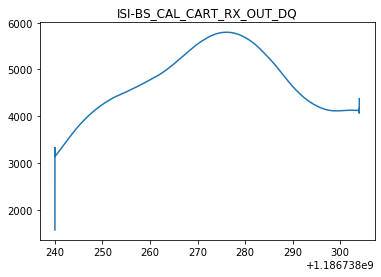

In [4]:
# -- Make a time vector
t0 = chan_val.attrs['gps_start']
dt = 1.0 / chan_val.attrs['fs']
dur = chan_val.attrs['duration']
time = np.arange(t0, t0+dur, dt)

# -- Plot the data
plt.plot(time, chan_val['data'])
plt.title('ISI-BS_CAL_CART_RX_OUT_DQ')

## Loop through all channels to check which are valid

In [5]:
# -- Count valid and invalid channels

filenamelist = ['/L1/L-L1_AUXR-1186738240-64.h5', '/H1/H-H1_AUXR-1186738240-64.h5']

totalvalid = 0
for fn in filenamelist:
    valid = 0
    invalid = 0
    fid = h5.File(data_dir + fn, 'r')
    
    # loop over groups of channels
    for k1 in fid.keys():
        grp = fid[k1]
        # loop over channels in the group
        for k2 in grp.keys():
            # if the channel is valid, get the data and print its properties
            if (grp[k2].attrs['valid']):
                valid += 1
            else:
                invalid += 1
                
    print("Checked file:", fn)
    print("Found {0} valid channels, {1} invalid channels \n".format(valid, invalid))
    totalvalid += valid
    
print("Found a total of {} valid channels".format(totalvalid))

Checked file: /L1/L-L1_AUXR-1186738240-64.h5
Found 565 valid channels, 62 invalid channels 

Checked file: /H1/H-H1_AUXR-1186738240-64.h5
Found 552 valid channels, 75 invalid channels 

Found a total of 1117 valid channels
